In [2]:
# Modules that we need
from Vissim_env_class import environment, Load_Vissim
from MasterDQN_Agent import MasterDQN_Agent

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
# General Libraries
import numpy as np 
import pylab as plt
import os
import csv
import pandas as pd
import json


In [3]:
vissim \
= \
Load_Vissim(
Path_to_network = 'C:\\Users\\nwalton\\OneDrive - The Alan Turing Institute\\Documents\\MLforFlowOptimisation\\NSW_Single_Cross_Experiment\\Single_Cross_Straight\\',\
inpx_Filename = 'Single_Cross_Straight.inpx',\
layx_Filename = 'Single_Cross_Straight.layx',\
attempts=5
)

success


# DQN Train

In [4]:
model_name  = 'Single_Cross_Straight'
#vissim_working_directory =  'C:\\Users\\Rzhang\\Desktop\\MLforFlowOptimisationOrigine\\Vissim\\'
vissim_working_directory='C:\\Users\\nwalton\\OneDrive - The Alan Turing Institute\\Documents\\MLforFlowOptimisation\\Vissim\\'

sim_length = 3601

agent_type = "DuelingDQN"
Session_ID = "Single_Cross_Straigth_DuelingDQN20c0"

# all controller actions
# all controller actions
Single_Cross_Straight_dictionary =\
{'junctions' : {
    # Controller Number 0 
    0 : {'default_actions' : {     0 : [1, 0, 1, 0],
                                     1 : [0, 1, 0, 1]
        },
         
         'all_actions' : {     0 : [1, 0, 1, 0],
                                     1 : [0, 1, 0, 1]
        },
 
         'link' : [1, 3, 5, 7],
         'lane' : ['1-1', '3-1', '5-1', '7-1'],
         'agent_type' : agent_type,
         'controled_by_com' : True,
         'green_time' : 6,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [5],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues',
         'queues_counter_ID' : [1,2,3,4]  }
        },
 'demand' : { 'default' : [400, 400, 400, 400],
             
             0 : [200,200,200,200],
             1 : [400,400,400,400],
             2 : [900,500,900,500],
             3 : [1000,500,1000,500],
             4 : [700,500,700,500],
             5 : [500,700,500,700],
             6 : [500,1000,500,1000],
             7 : [500,900,500,900],
             8 : [400,400,400,400],
             9 : [200,200,200,200]
            }
 
}

## DQN Hyperaramenters
episodes = 300
copy_weights_frequency = 10

PER_activated = True
memory_size = 1000
batch_size = 128

gamma = 0.95
alpha = 0.005

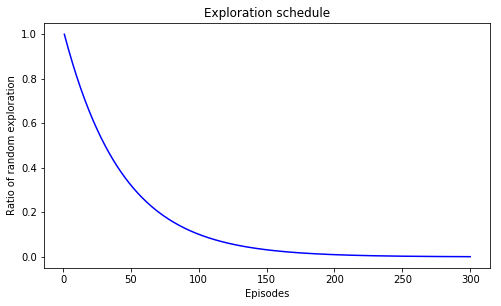

In [7]:
# Exploration Schedule ("linear" or "geometric")
exploration_schedule = "geometric"
epsilon_start = 1
epsilon_end   = 0.001

Random_Seed = 100

def choose_schedule(exploration_schedule, espilon_start, epsilon_end, episodes):
    if exploration_schedule == "linear":
        epsilon_decay = 1.2*(epsilon_end - epsilon_start)/(episodes-1)
        epsilon_sequence = [1 + epsilon_decay * entry for entry in range(episodes+1)]
        epsilon_sequence = [0 if entry < 0 else entry for entry in epsilon_sequence]
    elif exploration_schedule == "geometric":
        epsilon_decay = np.power(epsilon_end/epsilon_start, 1./(episodes-1)) # Geometric decay
        epsilon_sequence = [epsilon_start * epsilon_decay ** entry for entry in range(episodes+1)]
    elif exploration_schedule == "entropy":
        pass
    else:
        print("ERROR: Unrecognized choice of exploration schedule.")
        
    # Plotting exploration schedule
    plt.figure(figsize=(8,4.5))
    x_series = np.array(range(1,episodes+1))
    y_series = epsilon_sequence[0:episodes]
    plt.plot(x_series, y_series, '-b')
    plt.xlabel('Episodes')
    plt.ylabel('Ratio of random exploration')
    plt.title('Exploration schedule')
    plt.show()
    return(epsilon_sequence)

epsilon_sequence = choose_schedule(exploration_schedule, epsilon_start, epsilon_end, episodes)

In [8]:
Single_Cross_Straight_MultiDQN_Agents =\
MasterDQN_Agent(model_name, 
                vissim_working_directory, 
                sim_length, 
                Single_Cross_Straight_dictionary,
                'default_actions',
                gamma, alpha, agent_type, memory_size, PER_activated, 
                batch_size, copy_weights_frequency, epsilon_sequence,
                Random_Seed = Random_Seed, timesteps_per_second = 1, 
                Session_ID = Session_ID, verbose = True)

INTERSECTION 0: SETTING UP AGENT
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 5)            0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 24)           144         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 24)           600         dense[0][0]                      
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 24)           600         dense_1[0][0]                    
____________________________________________________________________________

In [9]:
Single_Cross_Straight_MultiDQN_Agents.prepopulate_memory()

Previous Experience: Found. Loading into agents
Previous Experience: Successfully loaded file from:
C:\Users\nwalton\OneDrive - The Alan Turing Institute\Documents\MLforFlowOptimisation\Vissim\Single_Cross_Straight\Agents_Results\DuelingDQN\Single_Cross_Straigth_DuelingDQN20c0\Agent0_PERPre_1000.p


In [10]:
Single_Cross_Straight_MultiDQN_Agents.load(300,False) 

Loading Pre-Trained Agent 0, Architecture, Optimizer and Memory.
Items successfully loaded.


In [11]:
Single_Cross_Straight_MultiDQN_Agents.demo(vissim=vissim)

[autoreload of tensorflow.python.keras.layers.core failed: Traceback (most recent call last):
  File "C:\Users\nwalton\AppData\Local\conda\conda\envs\vissimgpu\lib\site-packages\IPython\extensions\autoreload.py", line 244, in check
    superreload(m, reload, self.old_objects)
  File "C:\Users\nwalton\AppData\Local\conda\conda\envs\vissimgpu\lib\site-packages\IPython\extensions\autoreload.py", line 376, in superreload
    module = reload(module)
  File "C:\Users\nwalton\AppData\Local\conda\conda\envs\vissimgpu\lib\imp.py", line 315, in reload
    return importlib.reload(module)
  File "C:\Users\nwalton\AppData\Local\conda\conda\envs\vissimgpu\lib\importlib\__init__.py", line 147, in reload
    raise ImportError(msg.format(name), name=name)
ImportError: module DQNAgents not in sys.modules
]


Random seed set in simulator. Random Seed = 100
Deploying Network Parser...
Successful Network Crawl: Identified SignalControllers, Links, Lanes and Vehicle Inputs.

Setting Simulation mode to: demo
Starting Deployments of Signal Control Units...
SCUs successfully deployed. Elapsed time 0.55 seconds.

